In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import tensorflow as tf 

In [51]:
voice_data = pd.read_csv("voice.csv")
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [52]:
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [53]:
# Convert string label to float : male = 1, female = 0
dict = {'label':{'male':1,'female':0}}
voice_data.replace(dict,inplace = True)

In [54]:
# Splitting dataset into X and y
# :-1 means "give me all the rows except last one"
x = voice_data.iloc[:,:-1].copy()
y = voice_data.iloc[:,-1].copy()
# x = voice_data.iloc[:,0:20].copy()
#y = voice_data.iloc[:,20].copy()

In [55]:
# from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [56]:
min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

In [57]:
x_scale

array([[9.64185977e-02, 4.73408557e-01, 8.41252523e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.25828039e-01, 5.05074648e-01, 1.16899775e-01, ...,
        2.14438885e-03, 2.14592275e-03, 5.64489929e-02],
       [1.79222164e-01, 6.75535813e-01, 1.02872692e-01, ...,
        3.57398142e-04, 3.57653791e-04, 4.98851565e-02],
       ...,
       [4.84948580e-01, 7.99042208e-01, 6.90336544e-01, ...,
        1.34024303e-01, 1.34120172e-01, 2.08884632e-01],
       [4.92516043e-01, 7.45692037e-01, 6.95311295e-01, ...,
        1.64045747e-01, 1.64163090e-01, 3.33559435e-01],
       [5.95699639e-01, 7.68963896e-01, 6.87590032e-01, ...,
        2.50178699e-02, 2.50357654e-02, 3.75385802e-01]])

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

In [59]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)


(2217, 20) (475, 20) (476, 20) (2217,) (475,) (476,)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(20,)),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________


In [63]:
opd = tf.keras.optimizers.Adam(
    learning_rate=0.001)

In [64]:
model.compile(optimizer = opd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [65]:
#x_train = np.asarray(x_train)
#y_train = np.asarray(y_train)
#x_val = np.asarray(x_val)
#y_val = np.asarray(y_val)

In [66]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [67]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [68]:
hist = model.fit(x_train, y_train, batch_size = 28, epochs = 64, validation_data=(x_test, y_test))

Train on 2217 samples, validate on 476 samples
Epoch 1/64
2217/2217 [==============================] - 1s 333us/sample - loss: 0.6396 - accuracy: 0.6594 - val_loss: 0.5596 - val_accuracy: 0.7731
Epoch 2/64
2217/2217 [==============================] - 0s 60us/sample - loss: 0.4731 - accuracy: 0.8286 - val_loss: 0.4010 - val_accuracy: 0.8676
Epoch 3/64
2217/2217 [==============================] - 0s 66us/sample - loss: 0.3628 - accuracy: 0.8714 - val_loss: 0.3153 - val_accuracy: 0.8845
Epoch 4/64
2217/2217 [==============================] - 0s 57us/sample - loss: 0.2832 - accuracy: 0.8985 - val_loss: 0.2473 - val_accuracy: 0.8950
Epoch 5/64
2217/2217 [==============================] - 0s 58us/sample - loss: 0.2109 - accuracy: 0.9328 - val_loss: 0.1719 - val_accuracy: 0.9601
Epoch 6/64
2217/2217 [==============================] - 0s 56us/sample - loss: 0.1645 - accuracy: 0.9544 - val_loss: 0.1449 - val_accuracy: 0.9727
Epoch 7/64
2217/2217 [==============================] - 0s 56us/sample

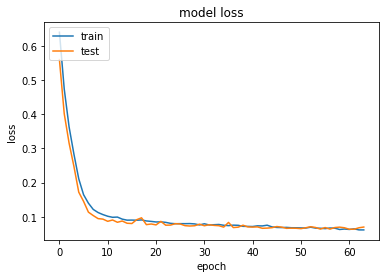

In [69]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()